In [2]:
import pandas as pd 



In [4]:
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install scikit-learn


In [22]:
import matplotlib.pyplot as plt # For plotting
import seaborn as sns           # For statistical data visualization
import scipy                    # For scientific computations
import sklearn                  # For machine learning
import numpy as np

In [4]:
df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df ["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df ["TotalCharges"] = df["TotalCharges"].astype("float")


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum().sum()

0

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df["customerID"].duplicated().sum()

0

In [10]:
def convert(value):
    if value == 1:
        return "yes"
    else:
        return "no"
df['SeniorCitizen'] = df['SeniorCitizen'].apply(convert)  

#converted 0 and 1 values of senoir citizen from 0 and 1 to better understanding

In [21]:
df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


#how many % customer are churnout or not

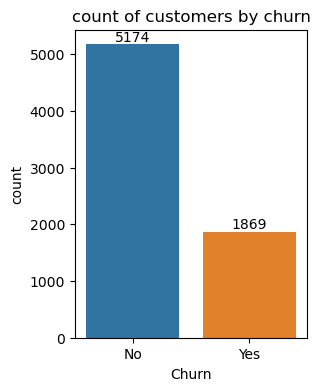

In [11]:
plt.figure(figsize = (3,4))
ax = sns.countplot(x ="Churn",data = df)
plt.title("count of customers by churn")
ax.bar_label(ax.containers[0])
plt.show()

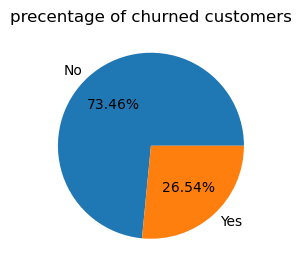

In [12]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
#gb
plt.pie(gb['Churn'],labels =gb.index, autopct = "%1.2f%%")
plt.title("precentage of churned customers")
plt.show()


 #customer have churn from the given pie chart we can conclude that 26.54% of our customer churned out
 #lets explore reasons behind it

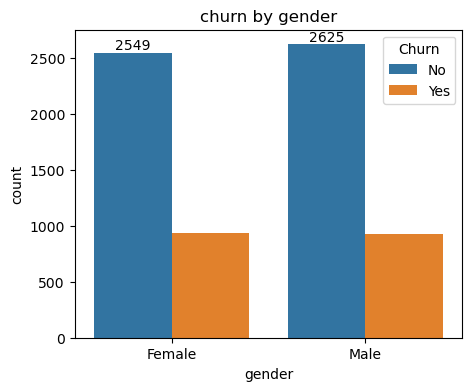

In [13]:
plt.figure(figsize = (5,4))
nm = sns.countplot( x = "gender",data = df, hue = "Churn")
nm.bar_label(nm.containers[0])
plt.title("churn by gender")
plt.show()

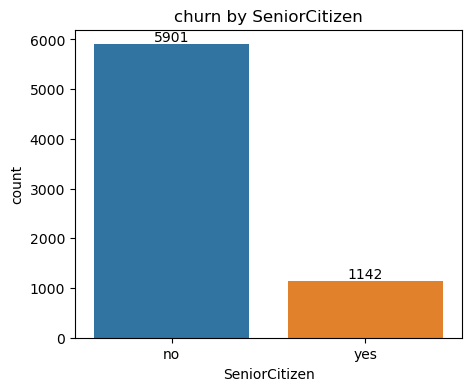

In [16]:
plt.figure(figsize = (5,4))
nm = sns.countplot( x = "SeniorCitizen",data = df)
nm.bar_label(nm.containers[0])
plt.title("churn by SeniorCitizen")
plt.show()

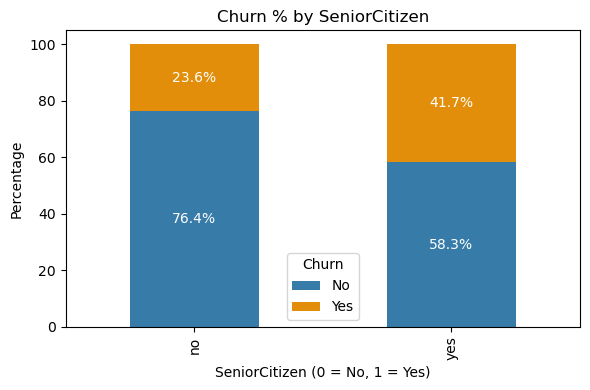

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

In [19]:
grouped = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)


percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100


colors = ['#377BA8', '#E28E0A'] 


ax = percentages.plot(kind='bar', stacked=True, figsize=(6, 4), color=colors)


for i, total in enumerate(grouped.sum(axis=1)):
    y_offset = 0
    for val in percentages.iloc[i]:
        label = f"{val:.1f}%"
        plt.text(i, y_offset + val / 2, label, ha='center', va='center', color='white', fontsize=10)
        y_offset += val

plt.title("Churn % by SeniorCitizen")
plt.ylabel("Percentage")
plt.xlabel("SeniorCitizen (0 = No, 1 = Yes)")
plt.legend(title="Churn", labels=['No', 'Yes'])
plt.tight_layout()
plt.show()
plt.figure(figsize = (5,3))


#comparative a grate percentage of people in senior citizen category have churned

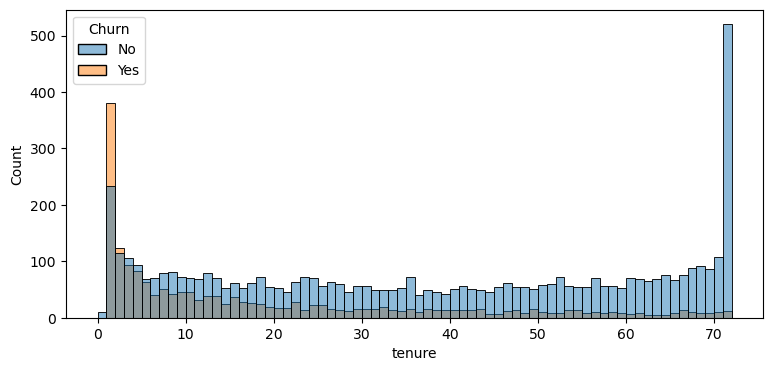

In [24]:
# sns.histplot(x = "tenure", data = df,bins = 72, hue = 'Churn')
# plt.show()
# plt.figure(figsize = (9,4))
# df.replace([np.inf, -np.inf], np.nan, inplace=True)
import warnings
# ✅ Clean data (still a good practice)
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# ✅ Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# ✅ Plot
plt.figure(figsize=(9, 4))
sns.histplot(x="tenure", data=df, bins=72, hue='Churn')
plt.show()


#people who have used our services for a long time have stayed and people who have used our service 1 or 2 months have churned

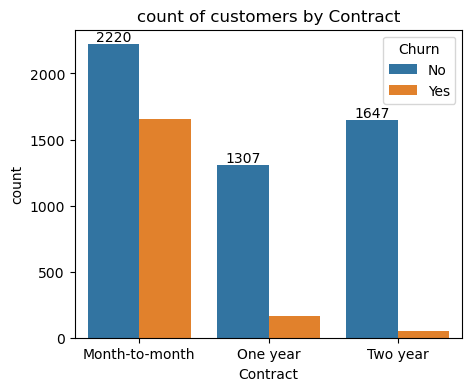

In [86]:
plt.figure(figsize = (5,4))
nm = sns.countplot( x = "Contract",data = df, hue = 'Churn')
nm.bar_label(nm.containers[0])
plt.title("count of customers by Contract")
plt.show()

#people who have month to month contract are likely to churn from the those who have 1 or 2 years of contract 

In [87]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

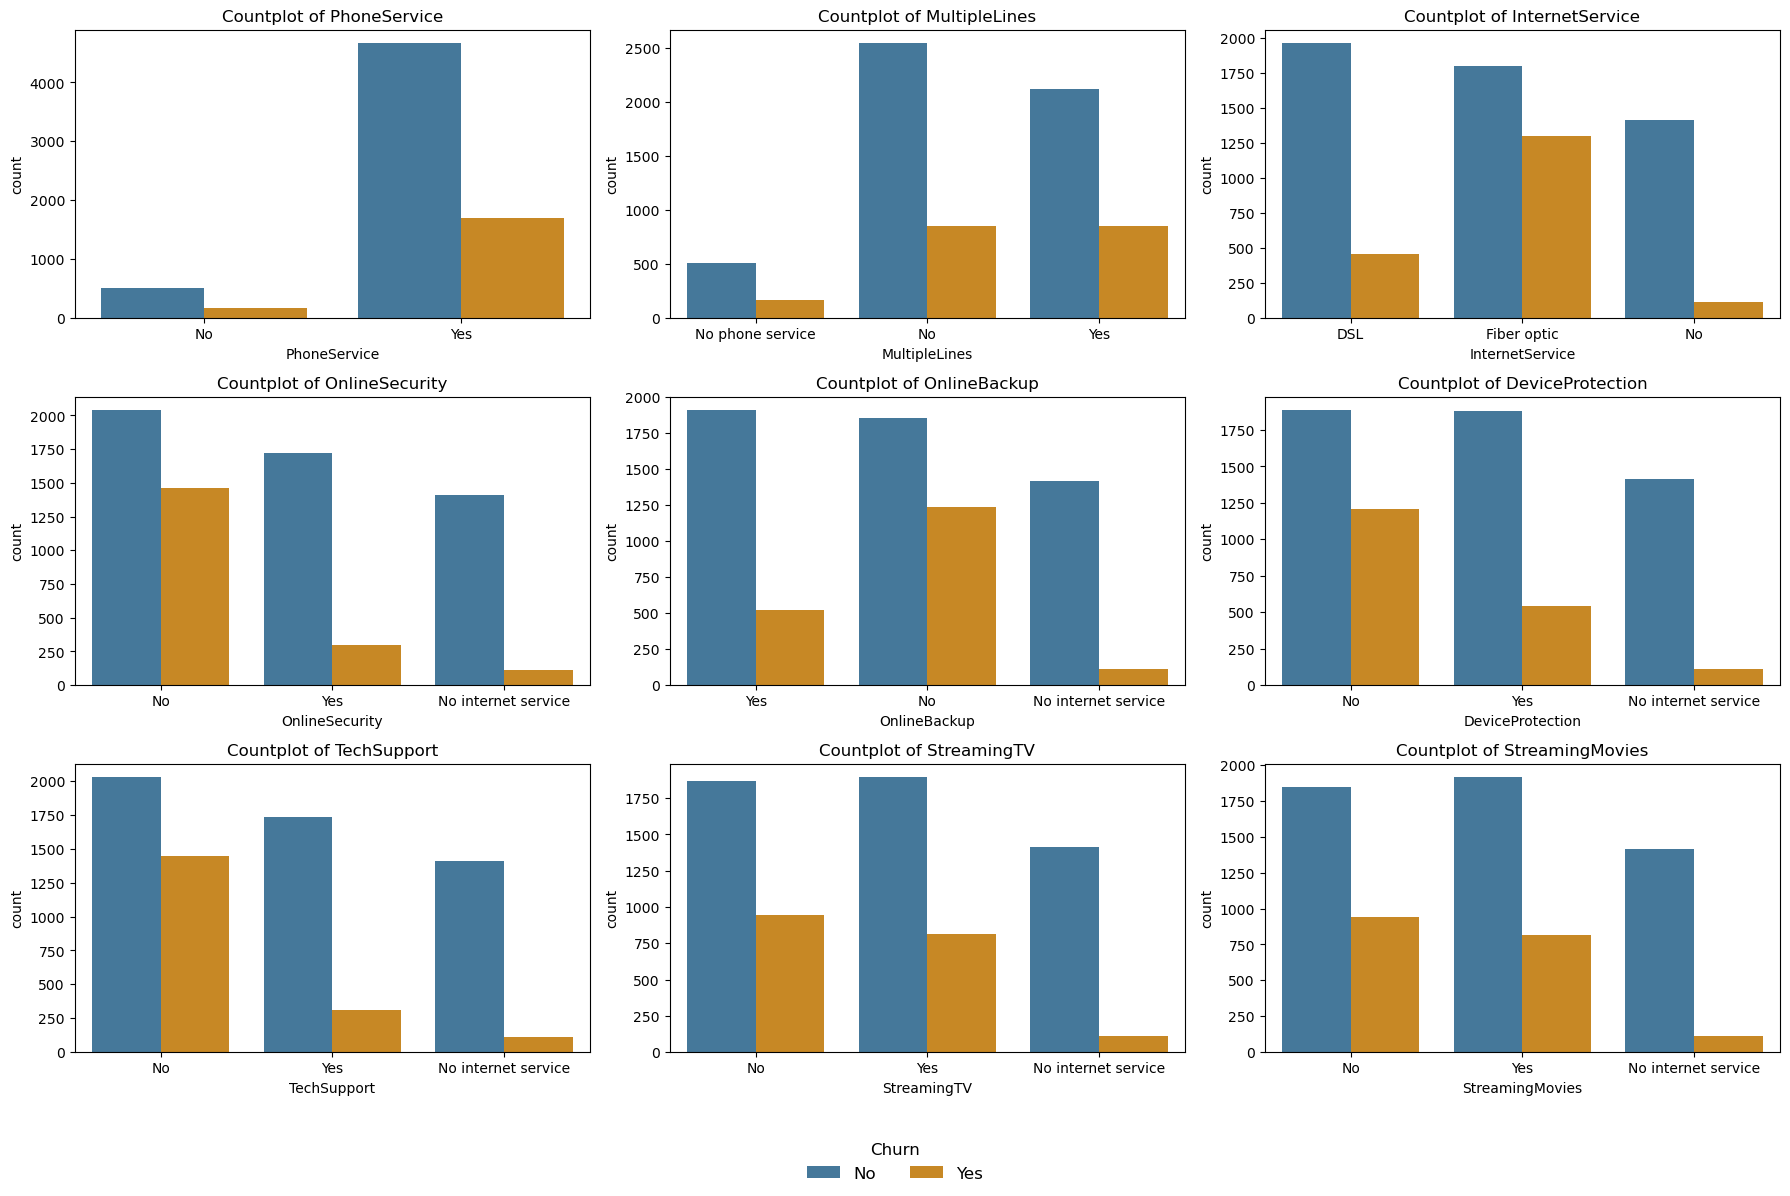

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of service-related columns
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']


rows, cols_per_row = 3, 3
fig, axes = plt.subplots(rows, cols_per_row, figsize=(18, 12))
axes = axes.flatten()


handles, labels = None, None


for i, col in enumerate(cols):
    ax = sns.countplot(data=df, x=col, ax=axes[i], hue='Churn', palette=['#377BA8', '#E28E0A'])
    ax.set_title(f'Countplot of {col}', fontsize=12)
    ax.tick_params(axis='x', rotation=0)  # ✅ Set labels horizontal
    ...

    
    if handles is None and labels is None:
        handles, labels = ax.get_legend_handles_labels()
    
    ax.legend_.remove() 


fig.legend(
    handles, labels,
    title='Churn',
    loc='lower center',
    ncol=len(labels),              
    frameon=False,
    fontsize=12,
    title_fontsize=12
)

plt.tight_layout(rect=[0, 0.07, 1, 1])  # Adjust bottom space for legend
plt.show()


#Customers with fiber optic internet and streaming services have a noticeably higher churn rate. In contrast, customers who opted for online security, backup, and tech support tend to stay longer. Overall, lack of support services and use of premium features correlate with higher churn.

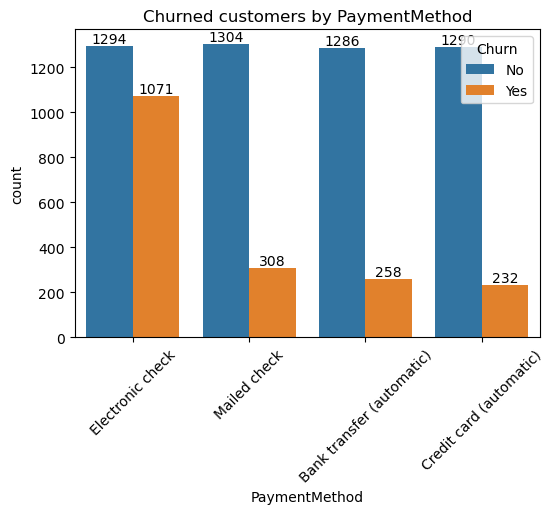

In [98]:
plt.figure(figsize = (6,4))
nm = sns.countplot( x = "PaymentMethod",data = df, hue = 'Churn')
nm.bar_label(nm.containers[0])
nm.bar_label(nm.containers[1])
plt.title("Churned customers by PaymentMethod")
plt.xticks(rotation = 45)
plt.show()

#customer is likely to churn when he is using electronic check as a payment method.